In [ ]:
import random

In [ ]:
import csv


def find_max_map(file_path):
    with open(file_path, mode="r", newline="") as csvfile:
        reader = csv.reader(x.replace("\0", "") for x in csvfile)
        header = next(reader)  # Read the header
        # Find the index of the 'metrics/mAP50-95(B)' column (8th column, zero-indexed as 7)
        map_column_index = 7

        # Initialize max value
        max_map_value = float("-inf")

        # Iterate over the rows and find the max value
        for row in reader:
            try:
                # Convert the value to float and update max_map_value if current value is higher
                map_value = float(row[map_column_index].strip())
                max_map_value = max(max_map_value, map_value)
            except ValueError:
                # Handle cases where conversion to float fails (e.g., empty or non-numeric values)
                continue

        return max_map_value


# Example usage:
# max_value = find_max_map('your_file.csv')
# print("Max mAP50-95(B):", max_value)

In [ ]:
def find_max_metric(file_path, metric_column):
    """
    Extracts the maximum value for a specified metric from a CSV file.

    :param file_path: Path to the CSV file.
    :param metric_column: Name of the column containing the desired metric.
    :return: The maximum value for the specified metric, or None if not found.
    """
    with open(file_path, mode="r", newline="") as csvfile:
        reader = csv.reader(x.replace("\0", "") for x in csvfile)
        headers = next(reader)  # Read the headers row
        headers = [x.lstrip() for x in headers]
        # Get the index of the specified metric column
        try:
            column_index = headers.index(metric_column)
        except ValueError:
            raise ValueError(f"Column '{metric_column}' not found in CSV headers.")

        max_metric_value = float("-inf")
        found = False

        # Iterate over the rows to find the max value for the specified column
        for row in reader:
            try:
                metric_value = float(row[column_index].strip())
                max_metric_value = max(max_metric_value, metric_value)
                found = True
            except (ValueError, IndexError):
                # Skip rows with invalid or missing values
                continue

        return max_metric_value if found else None

In [ ]:
# Define base paths and labels
methods = {
    "random": {
        "path": "random_{fraction}",
        "label": "Случайное дополнение",
        "color": [1, 0, 0],
    },
    "active": {
        "path": "active_{fraction}",
        "label": "По расстоянию",
        "color": [0, 1, 0],
    },
    "density": {
        "path": "density_{fraction}",
        "label": "По плотности",
        "color": [0, 0, 1],
    },
    "confidences": {
        "path": "confidences_{fraction}",
        "label": "По конфиденсу",
        "color": [1, 0, 1],
    },
}

base_path = "/home/setupishe/ultralytics/runs/detect/{method}/results.csv"
fractions = ["0.2"] + [f"0.{i}" for i in range(3, 8)]


def plot_metrics(methods, base_path, fractions, metric):

    # Initialize results
    results = {key: [] for key in methods.keys()}

    # Populate results
    for fraction in fractions:
        for method, info in methods.items():
            if fraction == "0.2" and method != "random":
                # Only "random" exists for 0.2; append None or a default value
                results[method].append(None)  # Or use a fallback value if needed
            else:
                file_path = base_path.format(
                    method=info["path"].format(fraction=fraction)
                )
                results[method].append(find_max_metric(file_path, metric))

    # Special handling for missing values (e.g., for 0.2 in non-random methods)
    for method in methods.keys():
        if results[method][0] is None:
            results[method][0] = results["random"][
                0
            ]  # Assign the random value if necessary

    # Plot results
    for method, info in methods.items():
        plt.plot(
            fractions,
            results[method],
            marker="+",
            lw=0,
            c=info["color"],
            label=info["label"],
        )

    plt.legend()
    plt.xlabel("Относительный размер обучающей выборки")
    plt.ylabel(metric)
    plt.show()

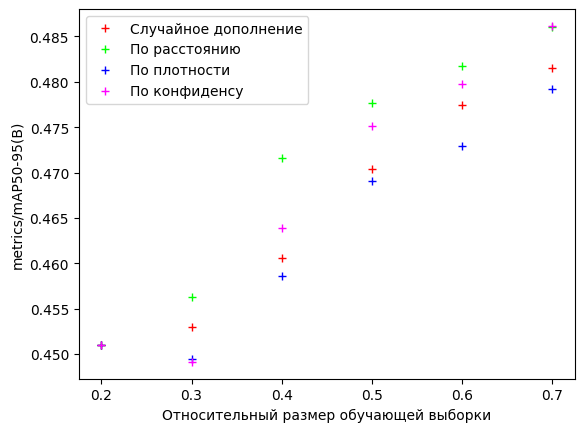

In [ ]:
plot_metrics(methods, base_path, fractions, "metrics/mAP50-95(B)")

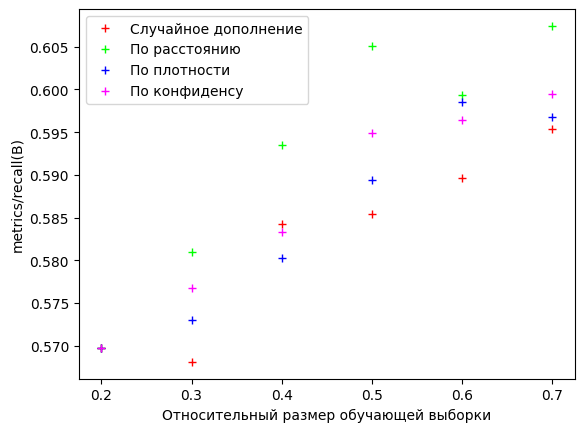

In [ ]:
plot_metrics(methods, base_path, fractions, "metrics/recall(B)")

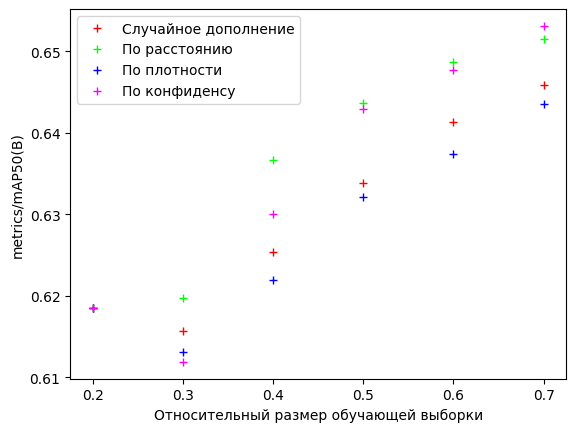

In [ ]:
plot_metrics(methods, base_path, fractions, "metrics/mAP50(B)")

In [ ]:
       metrics/mAP50(B)


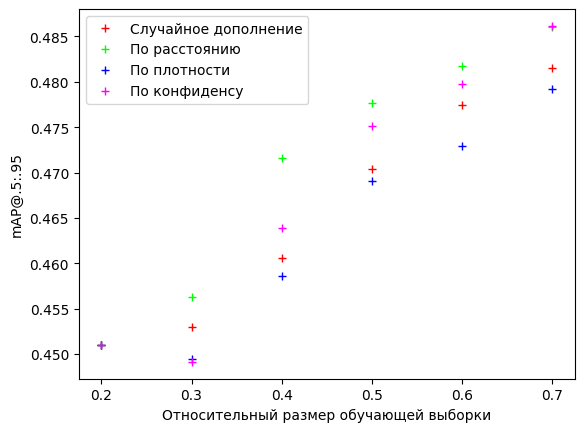

In [ ]:
actives = [
    find_max_map(f"/home/setupishe/ultralytics/runs/detect/random_{0.2}/results.csv")
]
randoms = [actives[0]]
confs = [actives[0]]
densities = [actives[0]]

fractions = ["0.2"]

In [ ]:
for i in range(3, 8):
    fraction = f"0.{i}"
    active_path = (
        f"/home/setupishe/ultralytics/runs/detect/active_{fraction}/results.csv"
    )
    random_path = (
        f"/home/setupishe/ultralytics/runs/detect/random_{fraction}/results.csv"
    )
    density_path = (
        f"/home/setupishe/ultralytics/runs/detect/density_{fraction}/results.csv"
    )
    conf_path = (
        f"/home/setupishe/ultralytics/runs/detect/confidences_{fraction}/results.csv"
    )

    actives.append(find_max_map(active_path))
    randoms.append(find_max_map(random_path))
    densities.append(find_max_map(density_path))
    confs.append(find_max_map(conf_path))
    fractions.append(fraction)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'mAP@.5:.95')

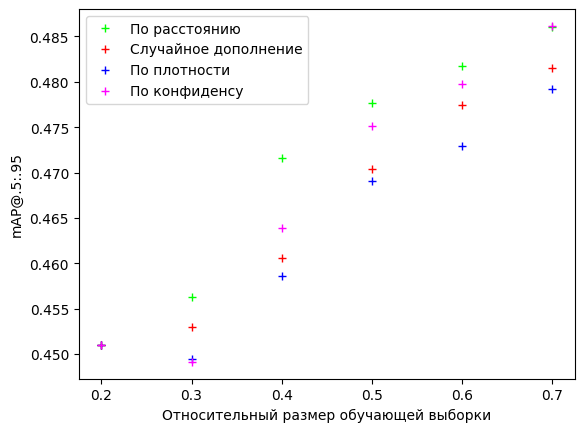

In [ ]:
plt.plot(fractions, actives, marker="+", lw=0, c=[0, 1, 0], label="По расстоянию")
plt.plot(
    fractions, randoms, marker="+", lw=0, c=[1, 0, 0], label="Случайное дополнение"
)
plt.plot(fractions, densities, marker="+", lw=0, c=[0, 0, 1], label="По плотности")
plt.plot(fractions, confs, marker="+", lw=0, c=[1, 0, 1], label="По конфиденсу")
plt.legend()
plt.xlabel("Относительный размер обучающей выборки")
plt.ylabel("mAP@.5:.95")